<a href="https://colab.research.google.com/github/vellanki6666/DevOps/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Addition

In [1]:
8+7


15

Subtraction

In [2]:
8-2

6

Multiplication

In [3]:
6*6

36

Linear Regression

Use when X variable is continuous and numeric and Y variable is also numeric(continuous)
If there are categorical variables as x, then dummy code them and use

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


Read the data 

Import the data from Hard Drive to Google *Colab*

In [5]:
from google.colab import files 
data_to_load = files.upload()


Saving Advertising.csv to Advertising.csv


In [6]:
import io
adv_data = pd.read_csv(io.BytesIO(data_to_load['Advertising.csv']))

Checking the Data

In [7]:
adv_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


NOTE: All the values in the above data are in thousands ('000s)

Features/Variables:
*   TV
*   Radio
*   Newspaper
*   Sales

TV, Radio and Newspaper are "Input" Vars / Features
Sales is the "Output" var


Checking the # of rows and columns

In [8]:
adv_data.shape



(200, 5)

Visualize the data 

In [9]:
adv_data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


# Visualize the relationship between features (input vars) and the target (output var)

Use Scatterplots


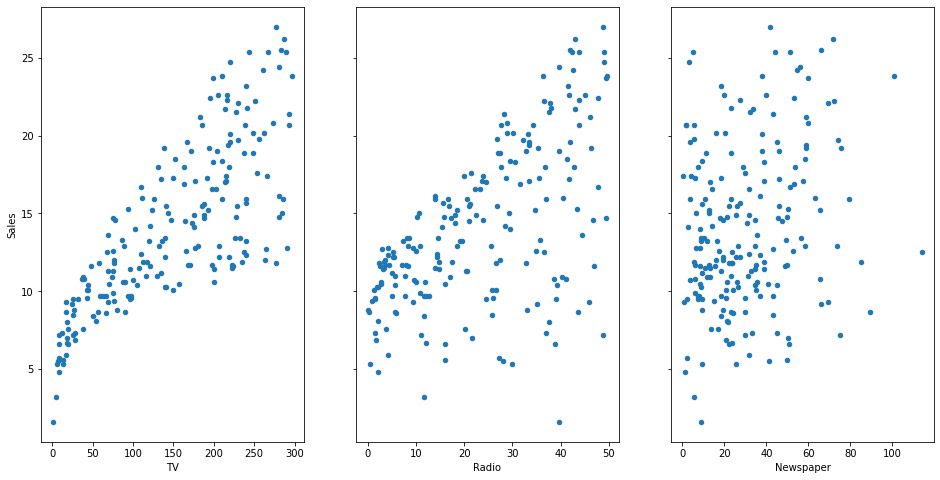

In [10]:
fig, axs = plt.subplots(1,3,sharey=True)
adv_data.plot(kind='scatter',  x='TV', y='Sales', ax=axs[0],  figsize=(16,8) )
adv_data.plot(kind='scatter',x='Radio',y='Sales', ax=axs[1] )
adv_data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])


Let us use "TV" ad spends to check the effect on sales


Create/Build the model in one line of code 

In [11]:
lm = smf.ols(formula= "Sales ~ TV", data=adv_data).fit()

Getting lm Model coefficents 

In [12]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

Manually doing predictions - E.g. Amount spent on TV ads is 50,000 dollars. What can be the expected sales?

Note: We need to enter only "50" and NOT "50,000" as the data we have used represents '000s


In [13]:
7.032594 +  0.047537 * (50)

9.409444

Using statsmodels to make predictions


*   Here we have to create a dataframe (df) because statsmodels formula interface expects a df

In [14]:
x_new=pd.DataFrame({"TV": [50]})
x_new.head()

,TV
0,50


In [15]:
lm.predict(x_new)

0    9.409426
dtype: float64

Computing P values

In [16]:
lm.pvalues


Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

We can get confident interval for the model coefficients. 

In [17]:
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


R sqare and Adjusted R square

In [18]:
lm.rsquared 
lm.rsquared_adj

0.6099148238341623

In [19]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 30 Sep 2022   Prob (F-statistic):           1.47e-42
Time:                        02:34:52   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model for radio

In [20]:
lm1 = smf.ols(formula= "Sales ~ Radio", data=adv_data).fit()

In [21]:
lm3 = smf.ols(formula= "Sales ~ Newspaper", data=adv_data).fit()

In [22]:
lm1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Fri, 30 Sep 2022   Prob (F-statistic):           4.35e-19
Time:                        02:34:52   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Fri, 30 Sep 2022   Prob (F-statistic):            0.00115
Time:                        02:34:52   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
lm1.pvalues

Intercept    3.561071e-39
Radio        4.354966e-19
dtype: float64

In [25]:
print(lm3.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Fri, 30 Sep 2022   Prob (F-statistic):            0.00115
Time:                        02:34:52   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.0

#Plot the (least squares) line 
* Select the smallest and largest values in the x variable (TV adv spend) and then make predictions * Use the predicted values and plot the least squares line

Create a dataframe (df) with min & max value of "x" i.e. min & max of TV adv spend

In [26]:
x_new= pd.DataFrame({"TV": [adv_data.TV.min(), adv_data.TV.mad()]})
x_new.head()

,TV
0,0.70000
1,75.10465


Make predictions for the min & max value stored in the new df X_new and save/store them

In [27]:
preds=lm.predict(x_new)
preds

0     7.065869
1    10.602816
dtype: float64

Let us first plot the observed data (the data given in the data set), then plot the least squares line

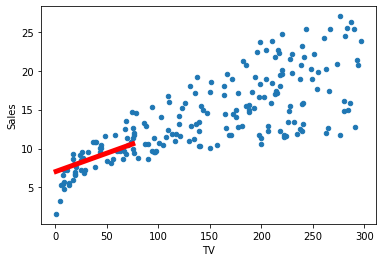

In [28]:
adv_data.plot(kind="scatter", x= "TV", y="Sales")
plt.plot(x_new,preds,c="red", linewidth="5")
plt.show()

#Multiple Linear Regression
Fitting the model with all the three "x" variables

In [29]:
lm = smf.ols(formula= "Sales ~ TV + Radio + Newspaper" , data= adv_data).fit()

Printing Coefficients

In [30]:
lm.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [31]:
lm.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64

In [32]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 30 Sep 2022   Prob (F-statistic):           1.58e-96
Time:                        02:34:52   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Using Categorical Variables as predictors in the model

All the variables that we have used so far in the model are continuous


Let us create a new "Categorical" variable/feature called as "Size". Let this new variable contain values as "small" or "large

Setting a random seed


Creating or generating random numbers

In [33]:
np.random.seed(1234)

In [34]:
nums = np.random.rand(len(adv_data))
nums


array([0.19151945, 0.62210877, 0.43772774, 0.78535858, 0.77997581,
       0.27259261, 0.27646426, 0.80187218, 0.95813935, 0.87593263,
       0.35781727, 0.50099513, 0.68346294, 0.71270203, 0.37025075,
       0.56119619, 0.50308317, 0.01376845, 0.77282662, 0.88264119,
       0.36488598, 0.61539618, 0.07538124, 0.36882401, 0.9331401 ,
       0.65137814, 0.39720258, 0.78873014, 0.31683612, 0.56809865,
       0.86912739, 0.43617342, 0.80214764, 0.14376682, 0.70426097,
       0.70458131, 0.21879211, 0.92486763, 0.44214076, 0.90931596,
       0.05980922, 0.18428708, 0.04735528, 0.67488094, 0.59462478,
       0.53331016, 0.04332406, 0.56143308, 0.32966845, 0.50296683,
       0.11189432, 0.60719371, 0.56594464, 0.00676406, 0.61744171,
       0.91212289, 0.79052413, 0.99208147, 0.95880176, 0.79196414,
       0.28525096, 0.62491671, 0.4780938 , 0.19567518, 0.38231745,
       0.05387369, 0.45164841, 0.98200474, 0.1239427 , 0.1193809 ,
       0.73852306, 0.58730363, 0.47163253, 0.10712682, 0.22921

In [35]:
mask_large = nums > 0.5

Creating a new var/feature called "Size" in our original dataframe

In [36]:
adv_data["Size"] = "Small"
adv_data.loc[mask_large,"Size"] = "Large"

In [37]:
adv_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales,Size
0,1,230.1,37.8,69.2,22.1,Small
1,2,44.5,39.3,45.1,10.4,Large
2,3,17.2,45.9,69.3,9.3,Small
3,4,151.5,41.3,58.5,18.5,Large
4,5,180.8,10.8,58.4,12.9,Large


Create a new feature and name it "IsLarge"


In [38]:

adv_data["Is_Large"] = adv_data.Size.map ({"Small": 0,"Large" :1} )
adv_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales,Size,Is_Large
0,1,230.1,37.8,69.2,22.1,Small,0
1,2,44.5,39.3,45.1,10.4,Large,1
2,3,17.2,45.9,69.3,9.3,Small,0
3,4,151.5,41.3,58.5,18.5,Large,1
4,5,180.8,10.8,58.4,12.9,Large,1


Multiple regression with new variable

In [39]:
lm = smf.ols(formula= "Sales ~ TV + Radio + Newspaper + Is_Large" , data= adv_data).fit()

In [40]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     426.6
Date:                Fri, 30 Sep 2022   Prob (F-statistic):           3.31e-95
Time:                        02:34:52   Log-Likelihood:                -385.96
No. Observations:                 200   AIC:                             781.9
Df Residuals:                     195   BIC:                             798.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0158      0.334      9.030      0.000       2.357       3.674
TV             0.0458      0.001     32.730      0.000       0.043       0.049
Radio          0.1883      0.009     21.823      0.000       0.171       0.205
Newspaper     -0.0008      0.006     -0.133      0.894      -0.012       0.011
Is_Large      -0.1575      0.242     -0.651      0.516      -0.635       0.320
==============================================================================
Omnibus:                       61.859   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.027
Skew:                          -1.342   Prob(JB):                     1.08e-35
Kurtosis:                       6.482   Cond. No.                         512.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Generating random numbers  and assigning 3 categories

In [41]:
np.random.seed(12345)

In [42]:
nums= np.random.rand(len(adv_data))
maskurban = nums > 0.66
masksuburban = (nums > 0.33)  & (nums < 0.66) 
adv_data["Area"] = "Rural"
adv_data.loc[maskurban,"Area"]= "Urban"
adv_data.loc[masksuburban,"Area"]= "SubUrban"
adv_data.head(20)

,Unnamed: 0,TV,Radio,Newspaper,Sales,Size,Is_Large,Area
0,1,230.1,37.8,69.2,22.1,Small,0,Urban
1,2,44.5,39.3,45.1,10.4,Large,1,Rural
2,3,17.2,45.9,69.3,9.3,Small,0,Rural
3,4,151.5,41.3,58.5,18.5,Large,1,Rural
4,5,180.8,10.8,58.4,12.9,Large,1,SubUrban
5,6,8.7,48.9,75.0,7.2,Small,0,SubUrban
6,7,57.5,32.8,23.5,11.8,Small,0,Urban
7,8,120.2,19.6,11.6,13.2,Large,1,SubUrban
8,9,8.6,2.1,1.0,4.8,Large,1,Urban
9,10,199.8,2.6,21.2,10.6,Large,1,SubUrban


Create dummy variables for "Area". Use get_dummies function

Note: We need to exclude the first dummy column

In [43]:
area_dummies = pd.get_dummies(adv_data["Area"], prefix="Area").iloc[:,1:]


Add/Concatenate the dummy variables with the original dataframe

Note: Use axis = 1 (axis = 0 means rows and axis = 1 means columns)


In [54]:
adv_data = pd.concat([adv_data, area_dummies], axis = 1 )
adv_data.head(20)

,Unnamed: 0,TV,Radio,Newspaper,Sales,Size,Is_Large,Area,Area_SubUrban,Area_Urban,Area_SubUrban,Area_Urban
0,1,230.1,37.8,69.2,22.1,Small,0,Urban,0,1,0,1
1,2,44.5,39.3,45.1,10.4,Large,1,Rural,0,0,0,0
2,3,17.2,45.9,69.3,9.3,Small,0,Rural,0,0,0,0
3,4,151.5,41.3,58.5,18.5,Large,1,Rural,0,0,0,0
4,5,180.8,10.8,58.4,12.9,Large,1,SubUrban,1,0,1,0
5,6,8.7,48.9,75.0,7.2,Small,0,SubUrban,1,0,1,0
6,7,57.5,32.8,23.5,11.8,Small,0,Urban,0,1,0,1
7,8,120.2,19.6,11.6,13.2,Large,1,SubUrban,1,0,1,0
8,9,8.6,2.1,1.0,4.8,Large,1,Urban,0,1,0,1
9,10,199.8,2.6,21.2,10.6,Large,1,SubUrban,1,0,1,0


Building Multiple Linear Regression

In [55]:
mlm = smf.ols( formula = "Sales ~ TV + Radio + Newspaper + Is_Large + Area_SubUrban + Area_Urban", data=adv_data).fit()
print(mlm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     284.6
Date:                Fri, 30 Sep 2022   Prob (F-statistic):           5.33e-93
Time:                        03:05:02   Log-Likelihood:                -384.95
No. Observations:                 200   AIC:                             783.9
Df Residuals:                     193   BIC:                             807.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.1810      0.390  